In [99]:
# All module imports
import tensorflow as tf
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense
from sklearn.model_selection import train_test_split

In [100]:
# Initialize data set directory name and allowed image file extensions
dataSetDir = "Data Set"
imageExt = ["jpg","png","jpeg","webp"]
newImageSize = (256,256)

In [101]:
# Prevent tensorflow from using all GPU resources
gpus = tf.config.experimental.list_physical_devices("GPU")
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

# Cosmetic Statement. Only changes how prints are displayed
np.set_printoptions(linewidth=200)

In [131]:
# Reads all images from all directories within the dataset directory, and puts them into features and labels
classLabel = 0
features = []
labels = []
for imageDir in os.listdir(dataSetDir):
    for image in os.listdir(os.path.join(dataSetDir,imageDir)):
        if image.split(".")[-1] in imageExt:
            imagePath = os.path.join(dataSetDir,imageDir,image)
            image = cv2.cvtColor(cv2.imread(imagePath),cv2.COLOR_BGR2RGB)
            image = cv2.resize(image,newImageSize)
            #print(image)
            features.append(image)
            labels.append(classLabel)
            #plt.imshow(image)
            #plt.show()
    classLabel+=1

# Shuffle the features and labels together, unpack them, then normalize the feature sizes from 0-255 to 0-1 pixels
#dataSet = list(zip(features,labels))
#np.random.shuffle(dataSet)
#features, labels = zip(*dataSet)
features = np.array(features)
labels = np.array(labels)
features = features / 255

In [132]:
trainingImages, testImages, trainingLabels, testLabels = train_test_split(
    features, labels, test_size=0.3, random_state = 42)
#i = 25
#plt.title(trainingLabels[i])
#plt.imshow(trainingImages[i])

In [169]:
model = Sequential()
# Input Layer
model.add(Conv2D(64, (3,3), input_shape=(256,256,3), activation="relu"))
model.add(MaxPooling2D(2,2))
# Hidden Layers
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dense(64, activation="relu"))
# Output Layer
model.add(Dense(6,activation = "softmax"))
# Compile and summarize the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_46 (Conv2D)          (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_46 (MaxPooli  (None, 127, 127, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_47 (Conv2D)          (None, 125, 125, 64)      36928     
                                                                 
 max_pooling2d_47 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_48 (Conv2D)          (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_48 (MaxPooli  (None, 30, 30, 64)      

In [171]:
model.fit(trainingImages,trainingLabels,epochs=7)
model.evaluate(testImages,testLabels)

Epoch 1/7
3/3 [==============================] - 3s 843ms/step - loss: 1.0214 - accuracy: 0.7125
Epoch 2/7
3/3 [==============================] - 3s 853ms/step - loss: 0.8407 - accuracy: 0.7125
Epoch 3/7
3/3 [==============================] - 3s 847ms/step - loss: 0.6426 - accuracy: 0.8000
Epoch 4/7
3/3 [==============================] - 3s 839ms/step - loss: 0.3932 - accuracy: 0.8875
Epoch 5/7
3/3 [==============================] - 3s 849ms/step - loss: 0.3605 - accuracy: 0.8875
Epoch 6/7
3/3 [==============================] - 3s 869ms/step - loss: 0.3344 - accuracy: 0.8875
Epoch 7/7
2/2 [==============================] - 0s 32ms/step - loss: 0.6000 - accuracy: 0.7143


[0.600018322467804, 0.7142857313156128]

2/2 [==============================] - 0s 31ms/step
4 : [8.3759247e-08 6.4129063e-06 1.9368895e-06 1.2838580e-03 9.9870694e-01 7.3649505e-07] : 0.99870694
0 : [8.2755524e-01 1.1332636e-01 5.8478255e-02 5.3971022e-04 9.6313861e-06 9.0681184e-05] : 0.82755524
2 : [0.00874381 0.00043072 0.36160854 0.09995658 0.15889978 0.37036055] : 0.37036055
3 : [0.01373996 0.00337528 0.03800714 0.5727862  0.00798789 0.3641035 ] : 0.5727862
0 : [7.19409466e-01 6.45760521e-02 2.14585155e-01 1.12827390e-03 1.91802974e-04 1.09115565e-04] : 0.71940947
2 : [0.11516614 0.00180883 0.4269797  0.43109807 0.0130072  0.01194006] : 0.43109807
3 : [0.00306736 0.0013063  0.00504354 0.95047766 0.00328025 0.03682482] : 0.95047766
3 : [0.01538437 0.00475404 0.02570885 0.728769   0.0102088  0.21517491] : 0.728769
2 : [8.5625339e-01 9.3079085e-05 1.3905616e-01 3.0524086e-03 3.0597797e-04 1.2389669e-03] : 0.8562534
0 : [7.1930534e-01 8.7609095e-04 2.7879286e-01 8.0561708e-04 8.5095438e-05 1.3505110e-04] : 0.71930534
5 : [0

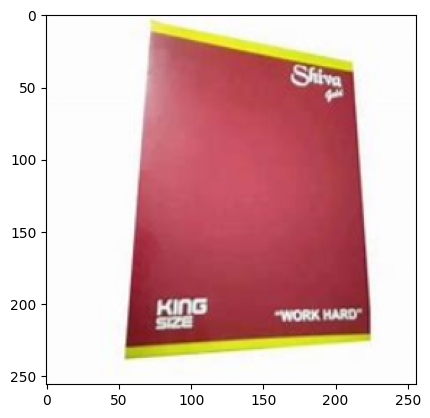

In [194]:
results = np.array(model.predict(testImages))
plt.imshow(testImages[5])
for i in range(len(testLabels)):
    print(testLabels[i],":",results[i],":",max(results[i]))